In [14]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

import random
import string
from Crypto.Cipher import AES

Text(0.5, 1.0, 'Original Audio Plot')

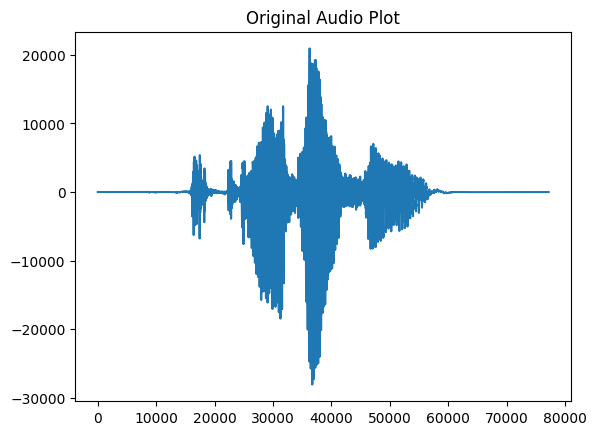

In [15]:
fs, data = wavfile.read('what-can-i-do-for-you-npc-british-male-99751.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [16]:
with open('what-can-i-do-for-you-npc-british-male-99751.wav', 'rb') as fd:
    contents = fd.read()

In [17]:
sd.play(data, fs)

In [18]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(32))

AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [19]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  Y6rhdymvFjU4LQG9F8T2LDEosaaRVIfd
AES Initialization vector is  uI8c0qYfhaLerEUW


In [20]:
encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
encrypted_audio = encryptor.encrypt(contents)

In [21]:
with open('encrypted_audio_file.wav', 'wb') as fd:
    fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated")

A file titled 'encrypted_audio_file.wav' is generated which is the encrypted audio to be communicated


In [22]:
with open('encrypted_audio_file.wav', 'rb') as fd:
    contents = fd.read()

In [23]:
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV.encode("utf-8"))
decrypted_audio = decryptor.decrypt(contents)

In [24]:
with open('decrypted_audio_file.wav', 'wb') as fd:
    fd.write(decrypted_audio)

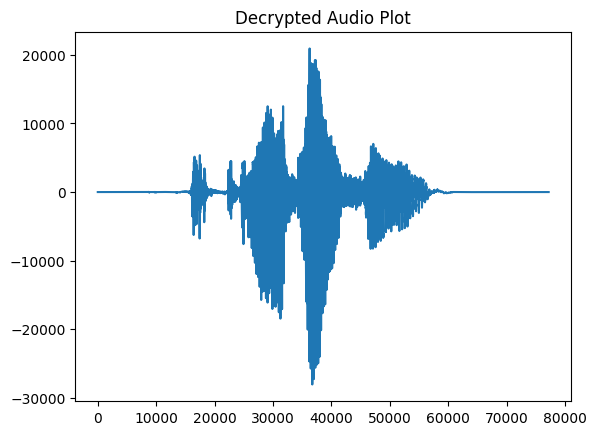

In [25]:
fs, data = wavfile.read('decrypted_audio_file.wav')
plt.plot(data)            # fs = sampling frequency = 44.1kHz
plt.title("Decrypted Audio Plot")
data_1 = np.asarray(data, dtype = np.int32)

In [26]:
sd.play(data, fs)